In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
f = lambda x: 0.1*x**5 - 0.2*x**3 + 0.1*x - 0.2
x = 0.1
h = 0.1

df1 = 0.090405
df2 = -0.118

# forward
dff1 = (f(x+h) - f(x))/h
dff2 = (f(x+2*h) - 2*f(x+h) + f(x))/h**2
print("%f")

%f


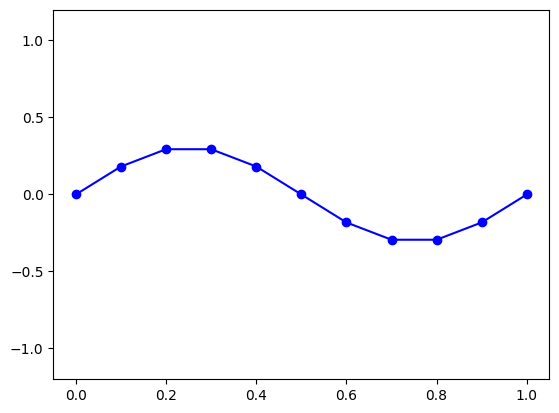

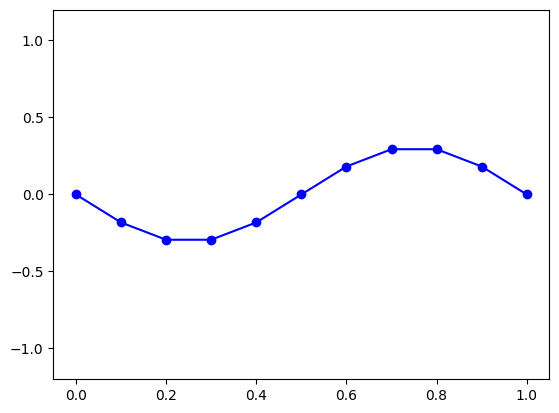

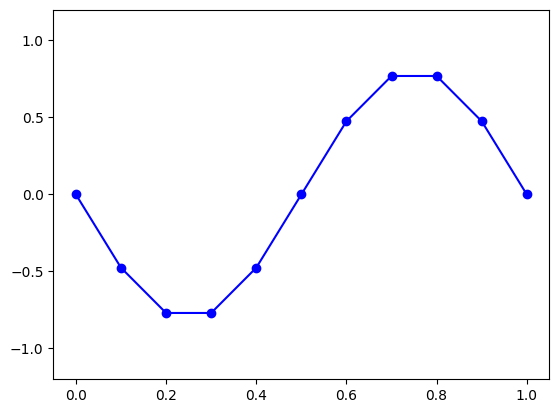

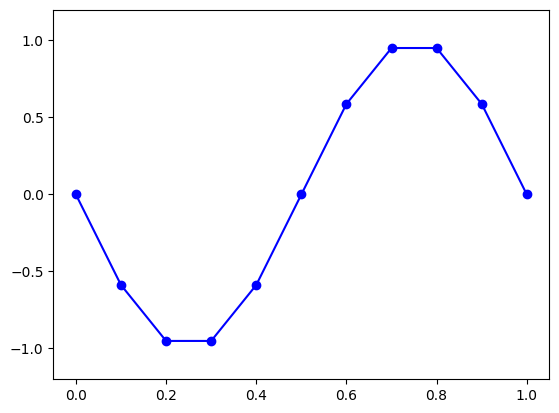

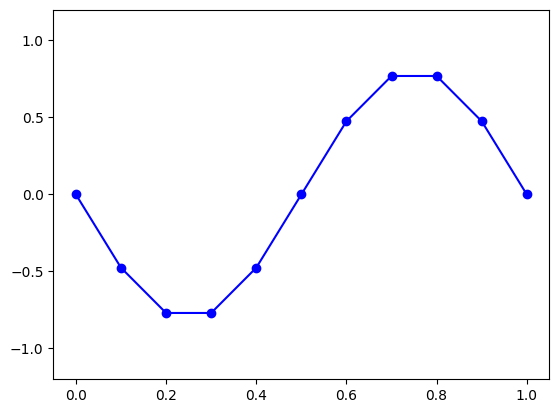

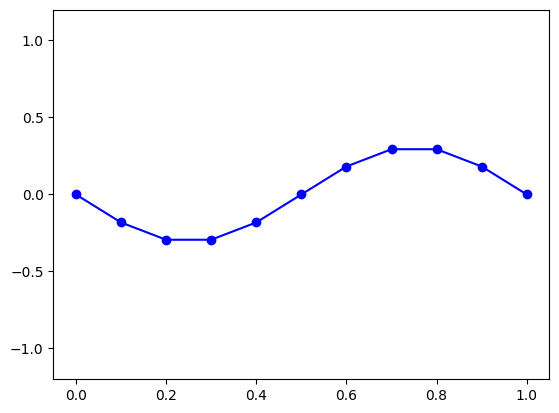

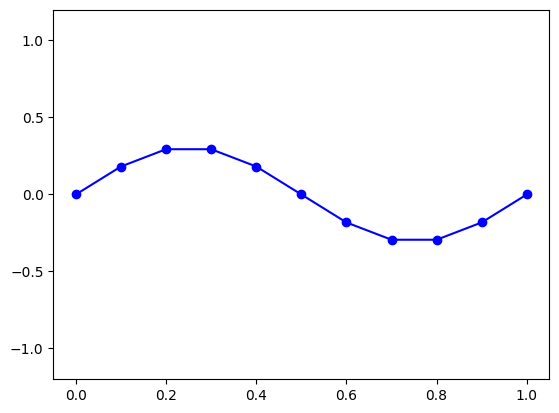

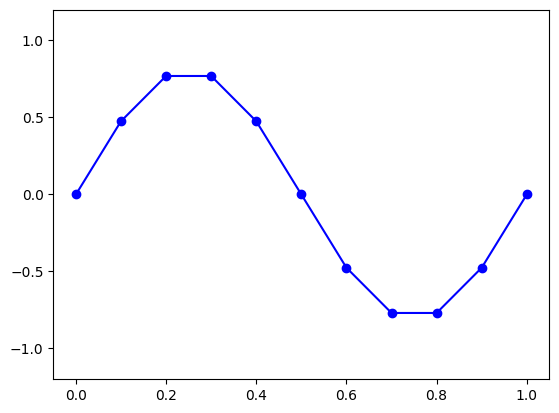

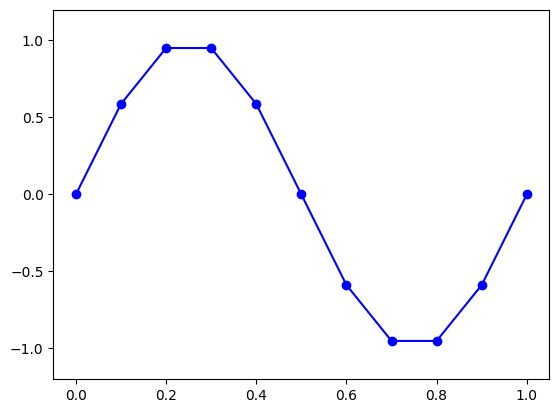

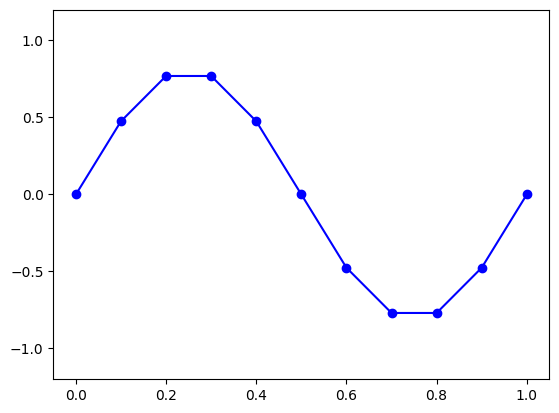

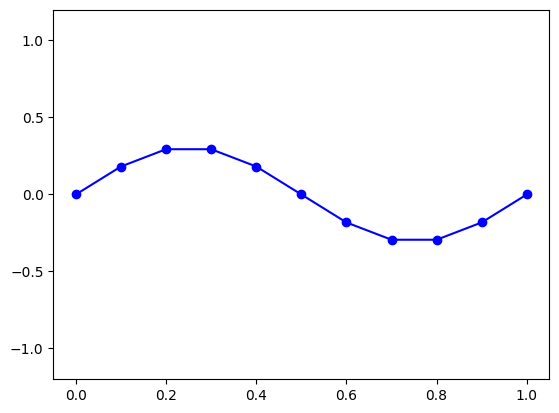

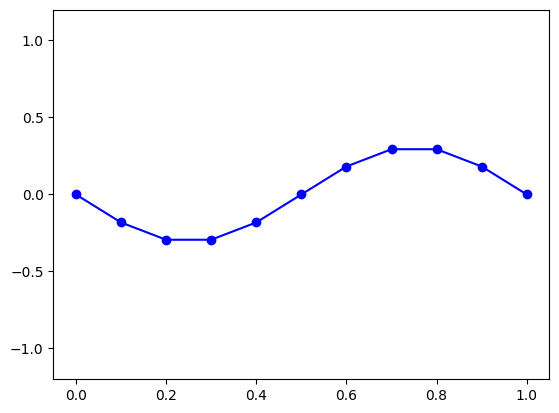

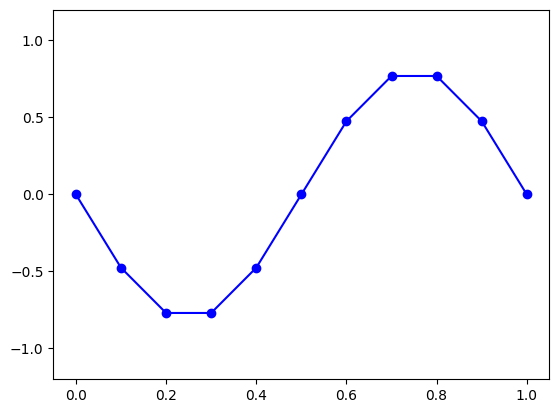

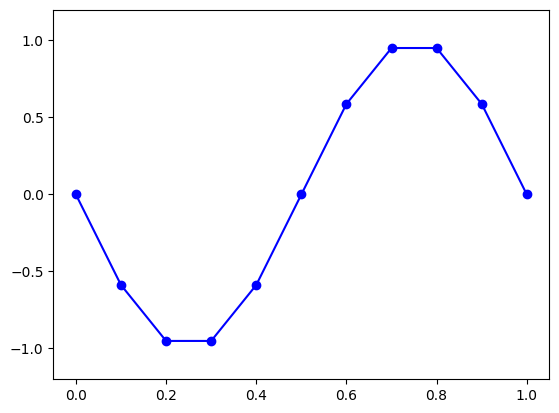

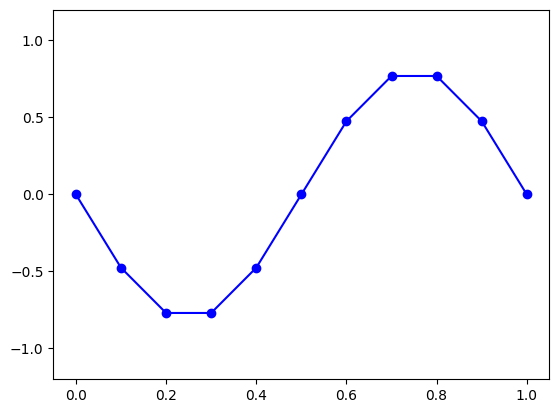

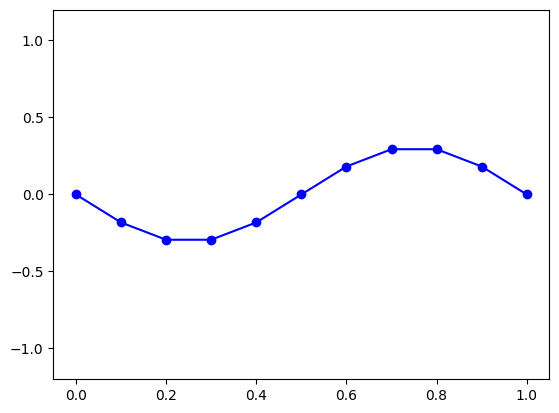

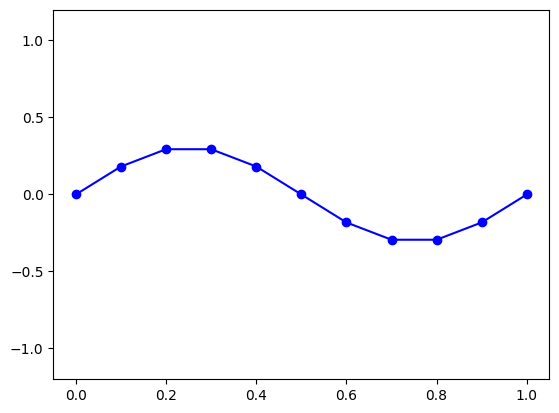

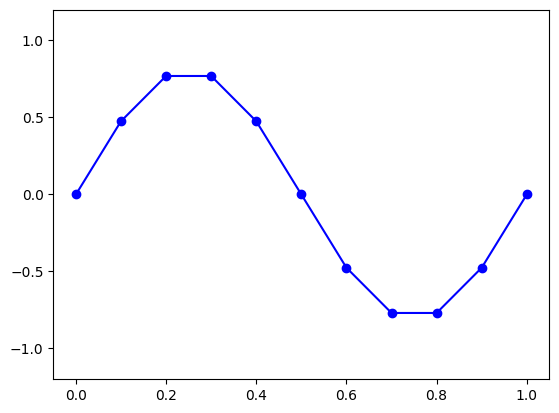

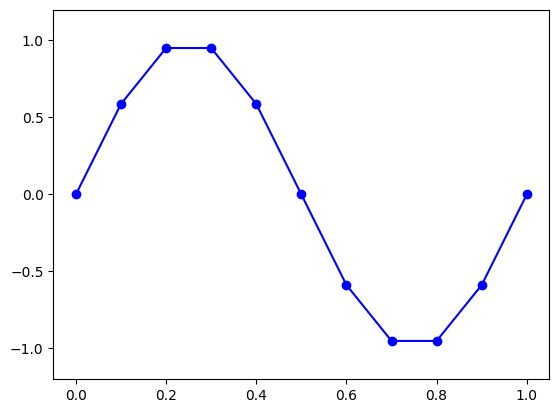

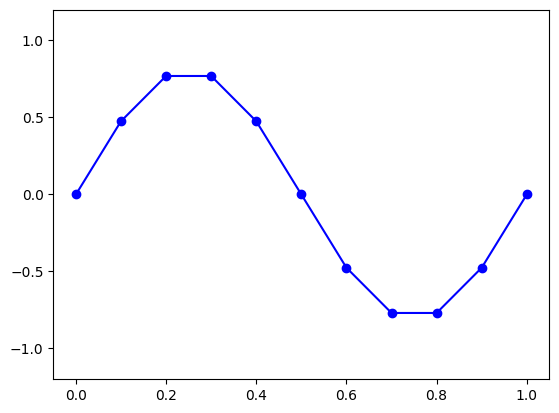

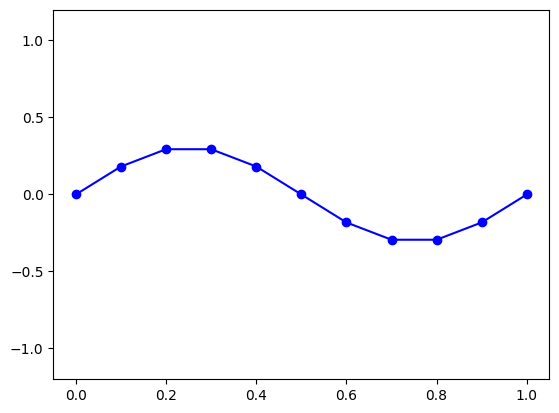

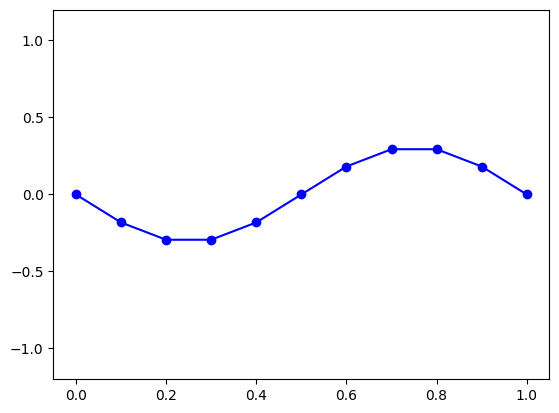

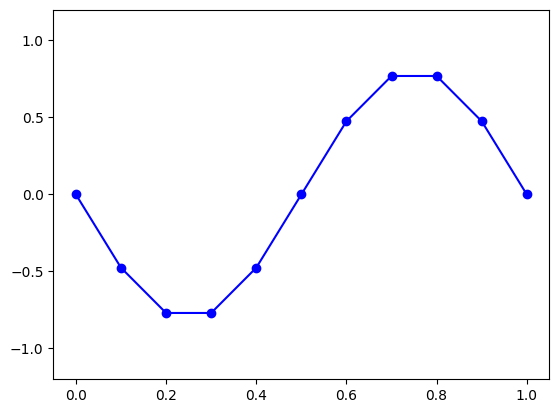

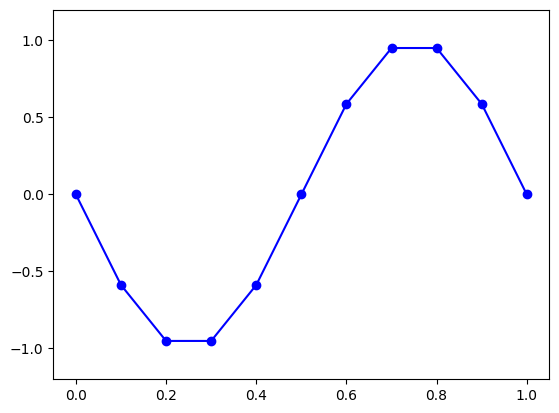

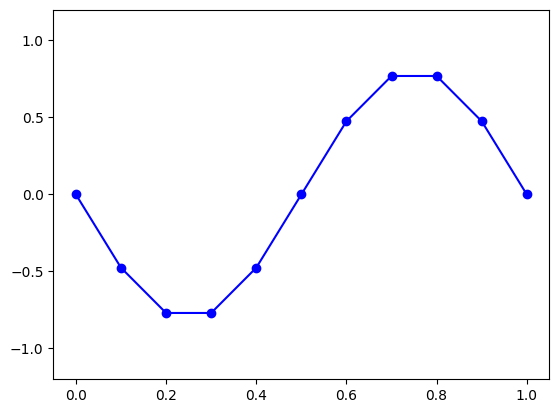

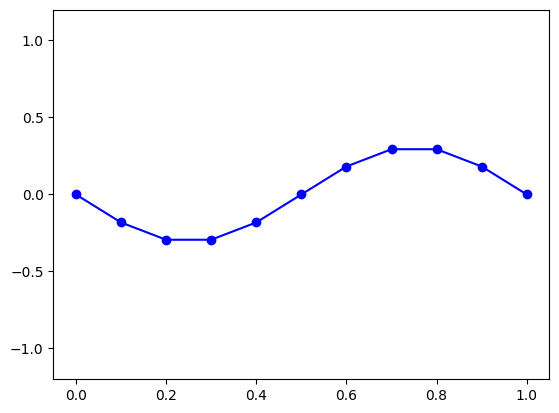

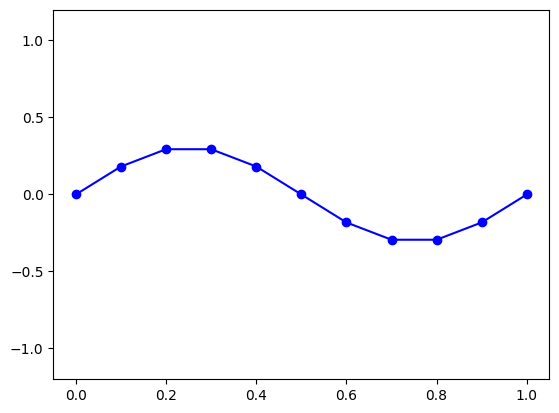

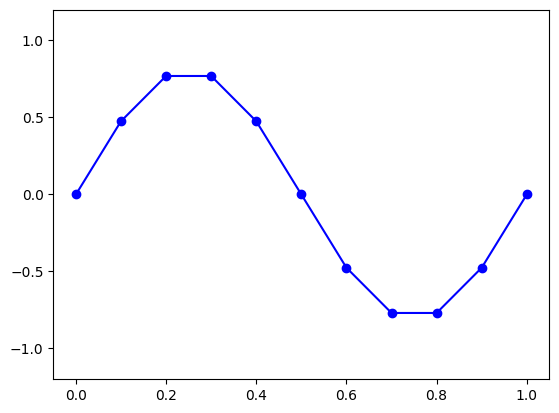

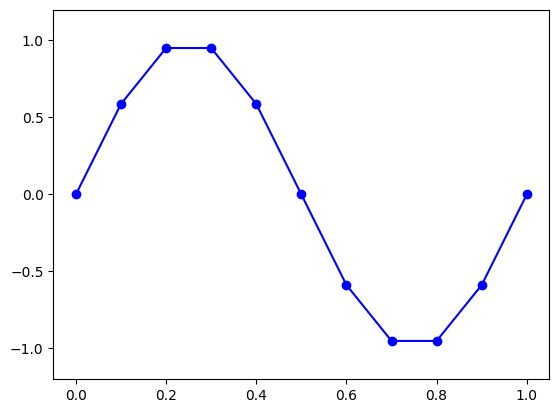

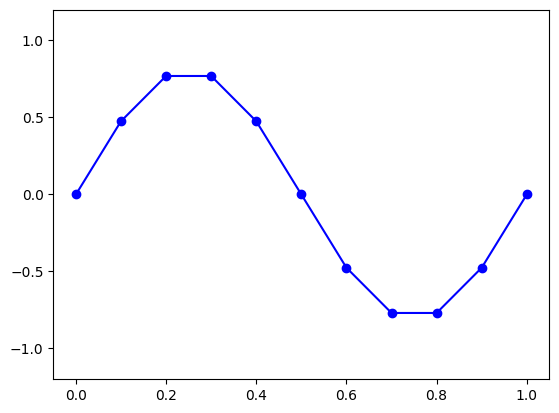

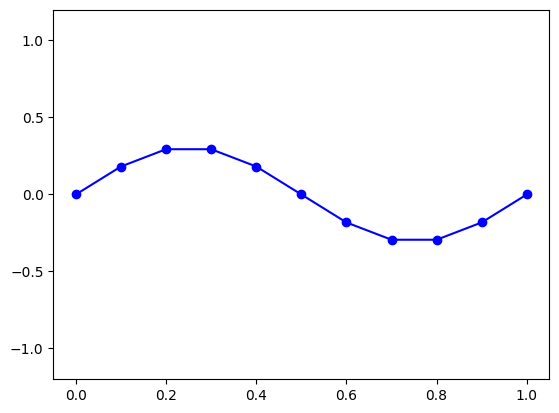

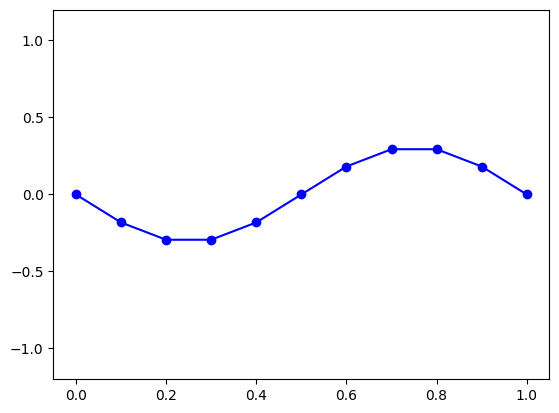

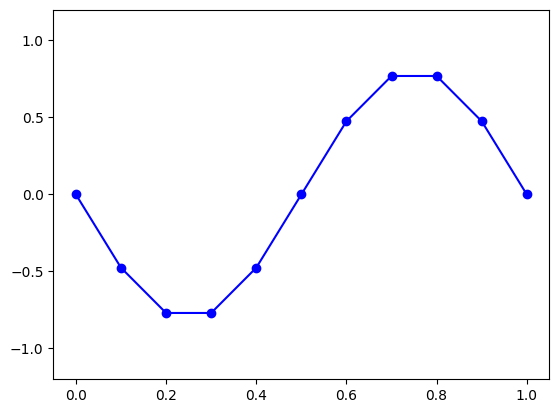

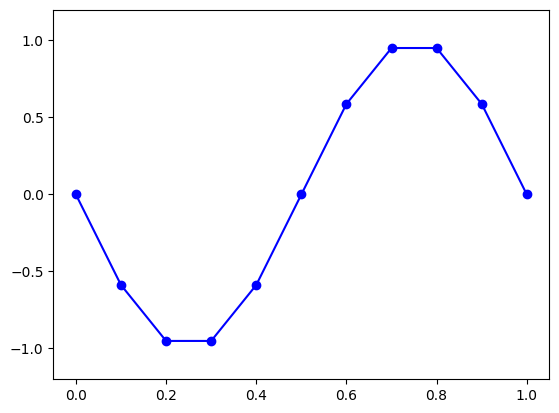

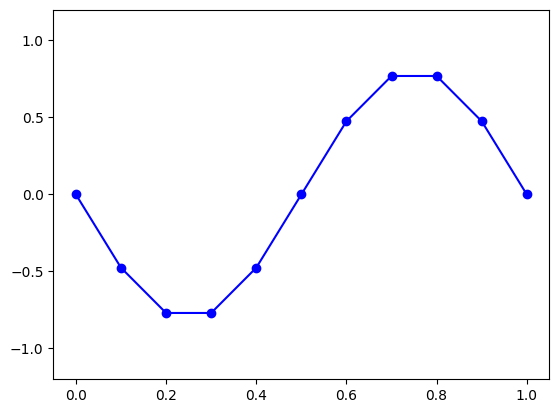

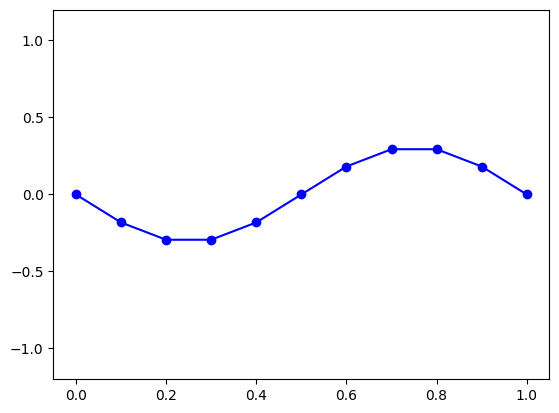

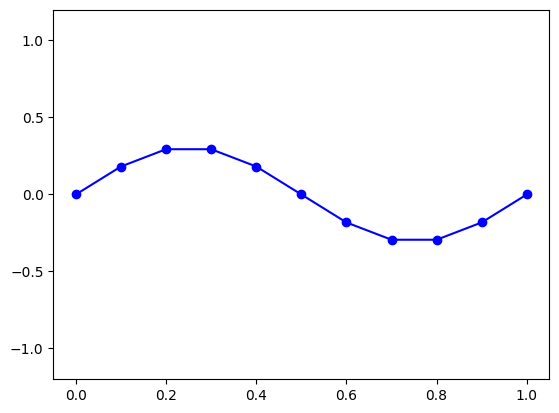

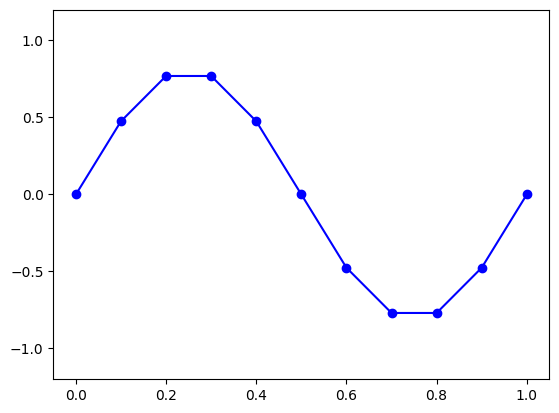

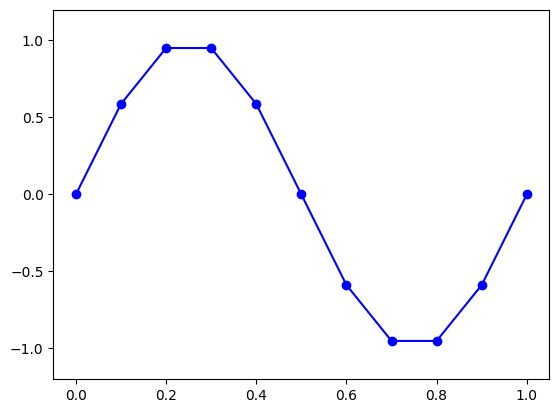

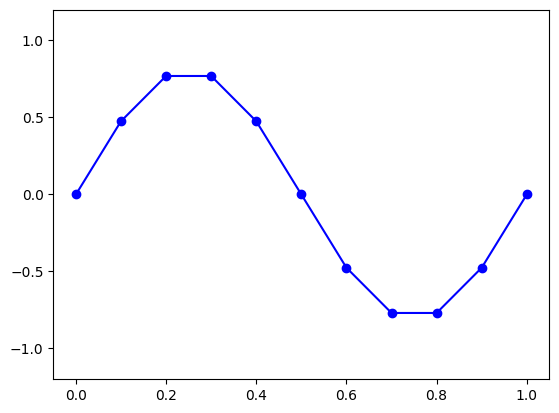

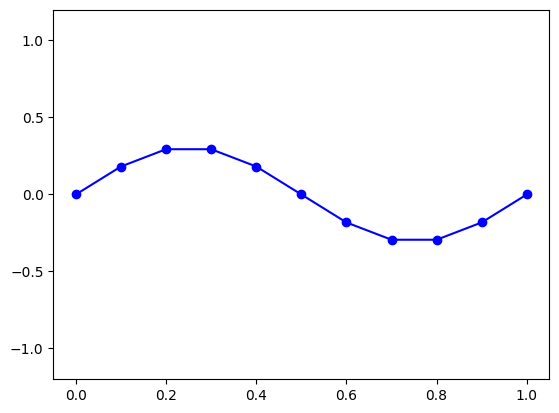

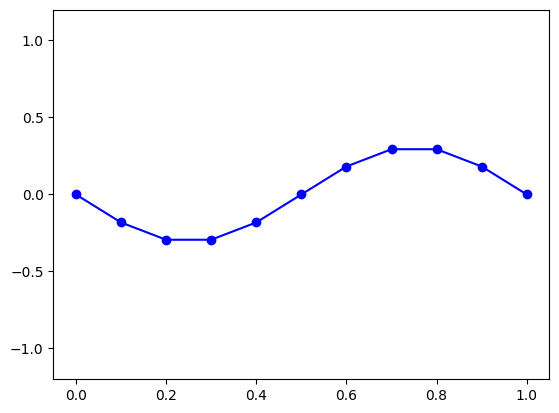

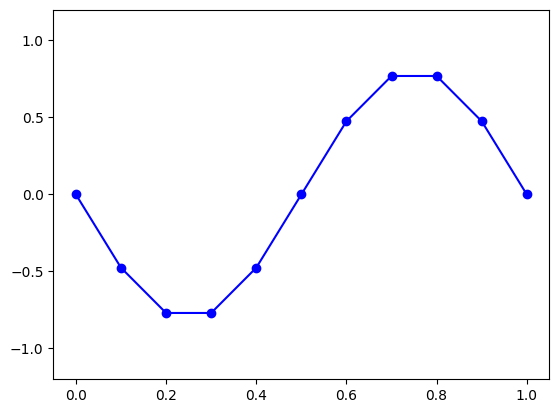

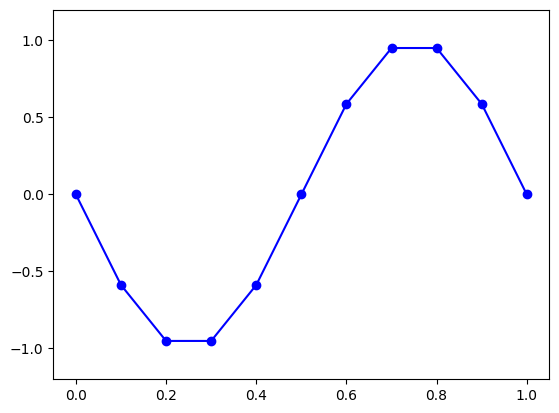

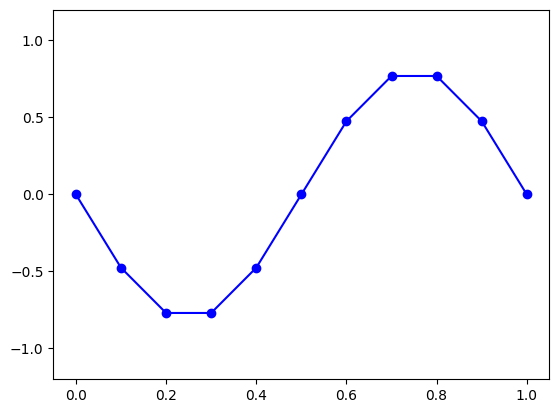

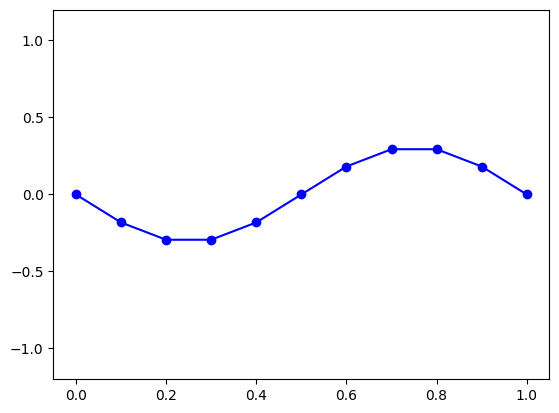

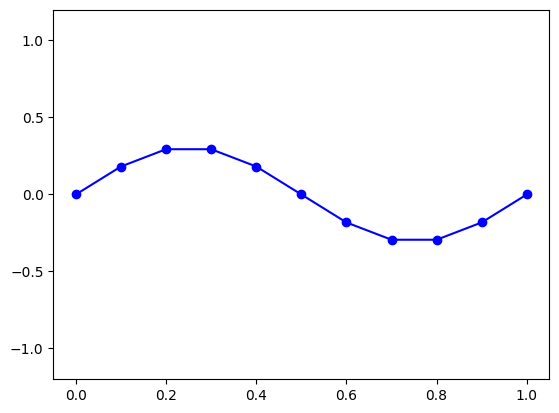

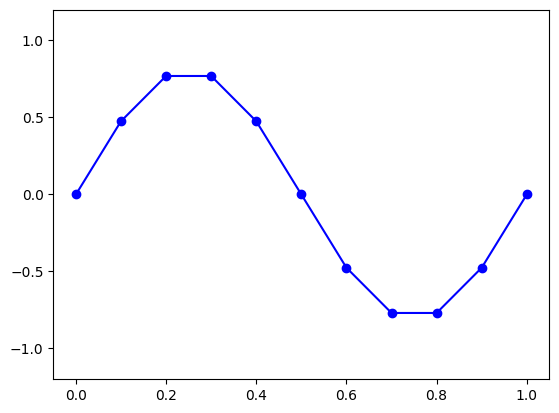

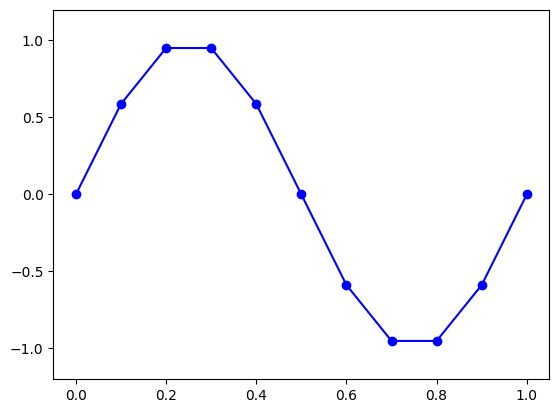

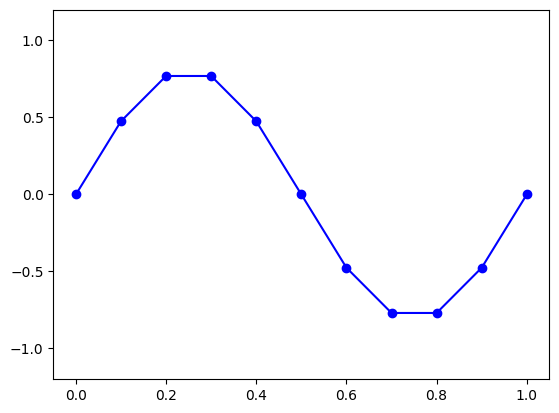

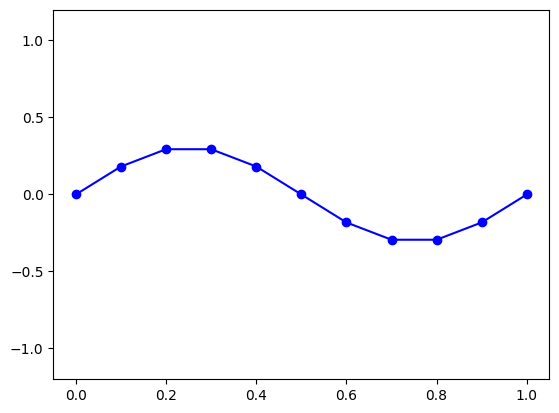

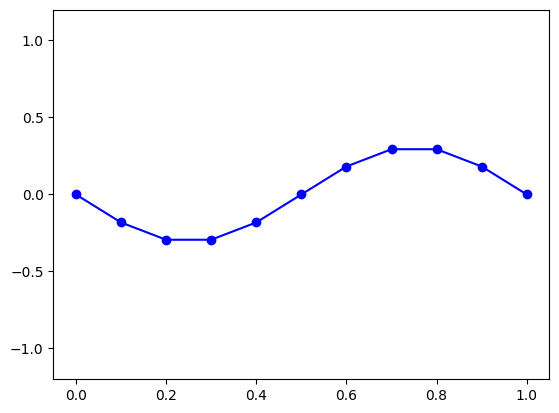

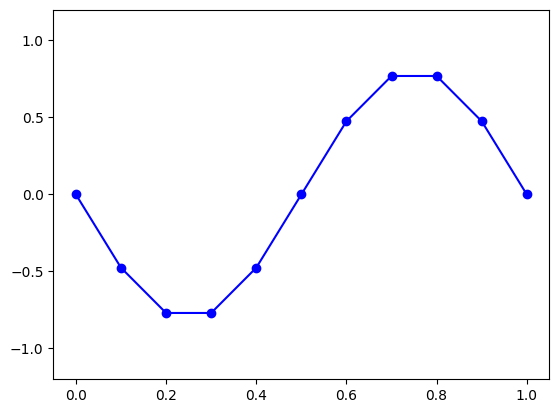

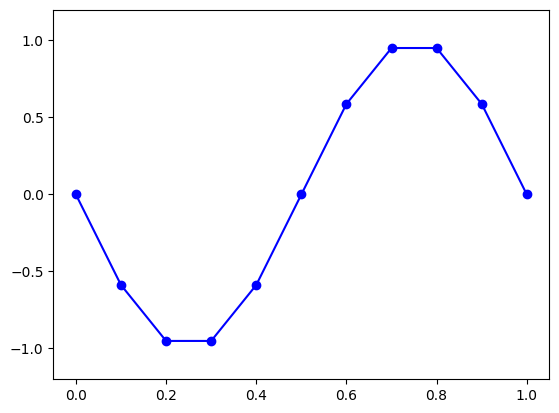

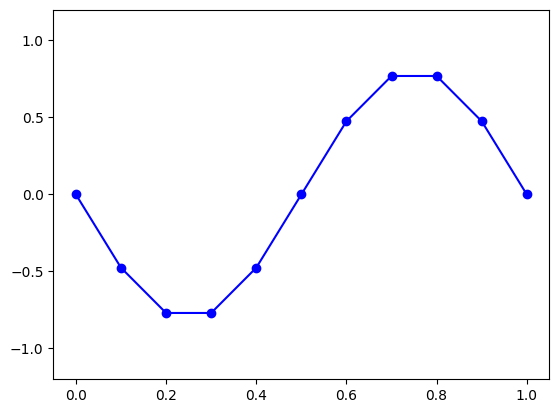

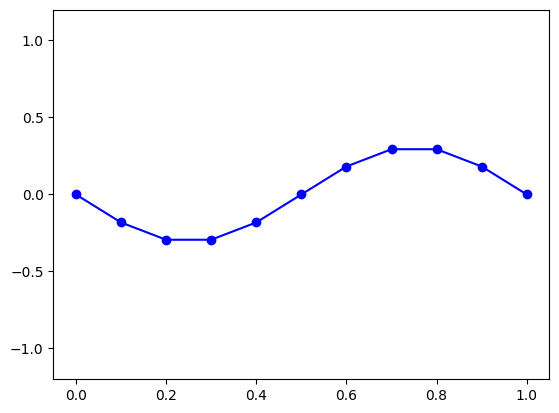

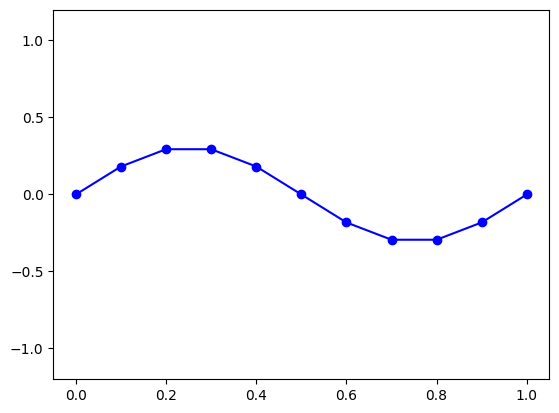

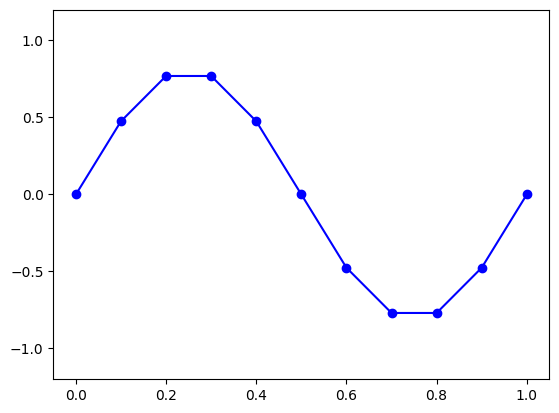

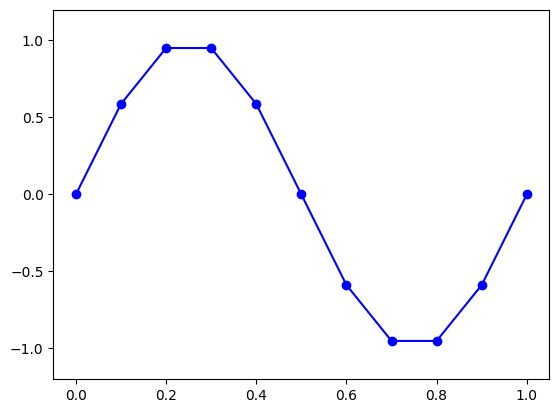

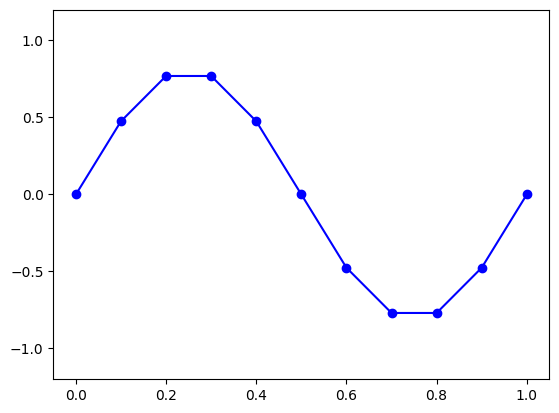

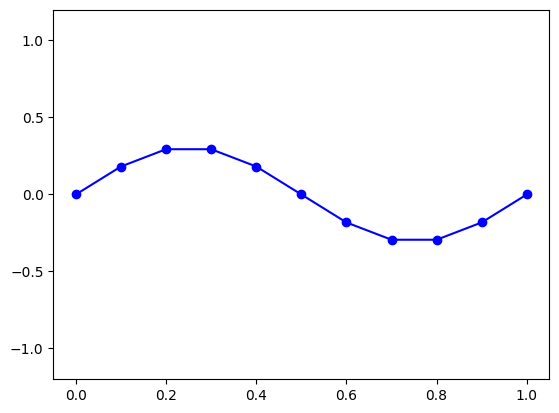

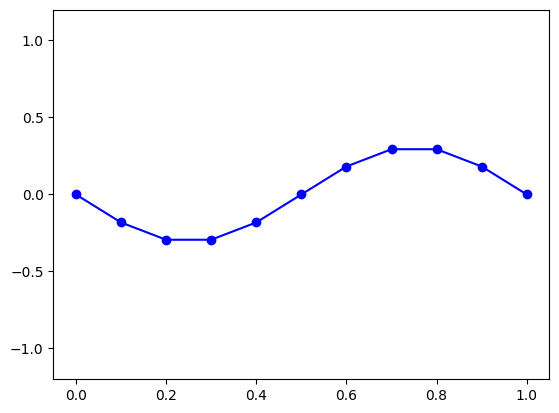

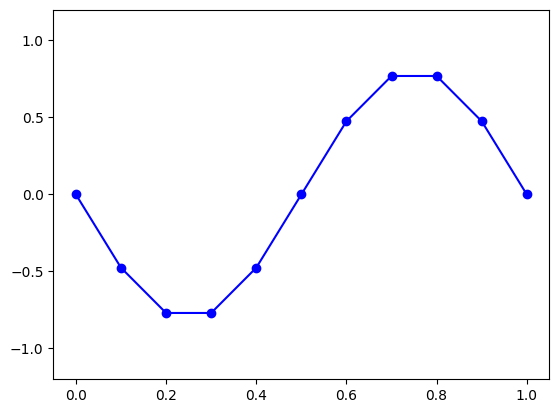

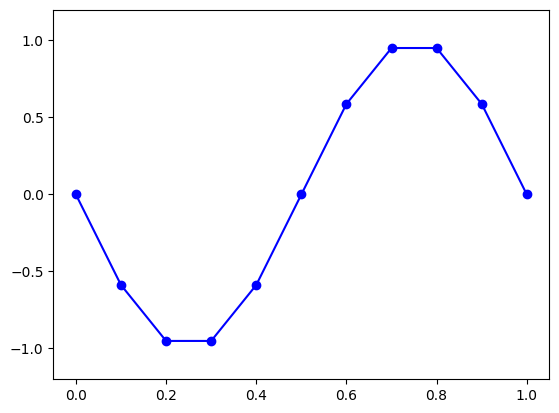

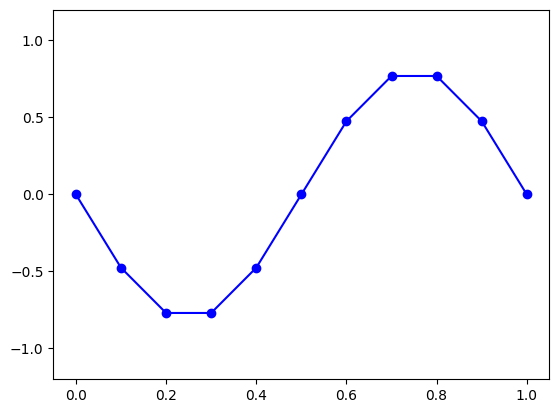

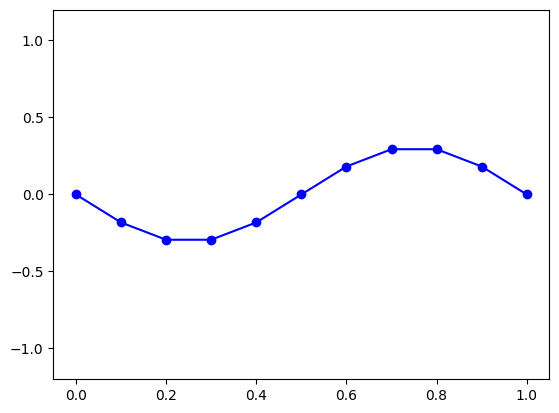

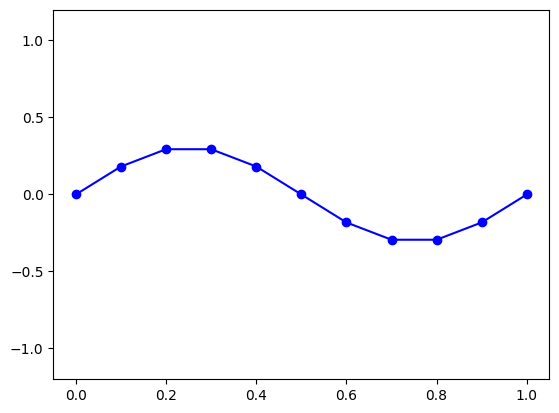

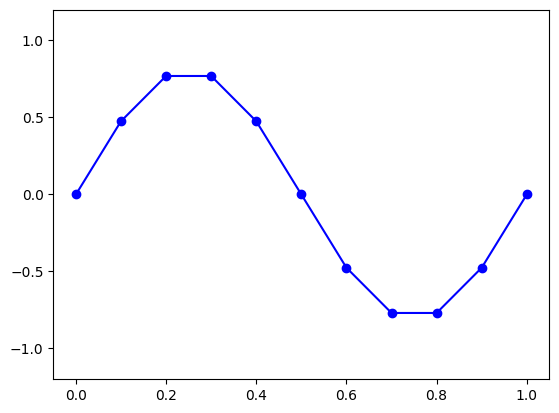

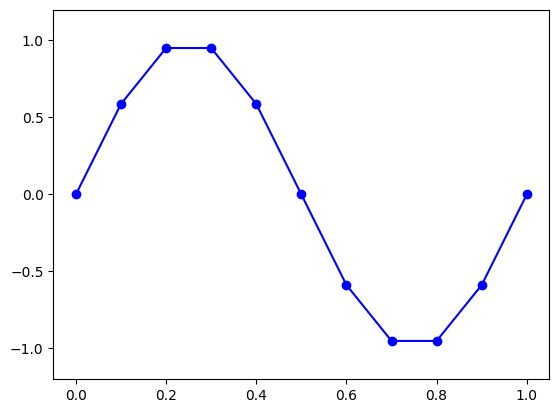

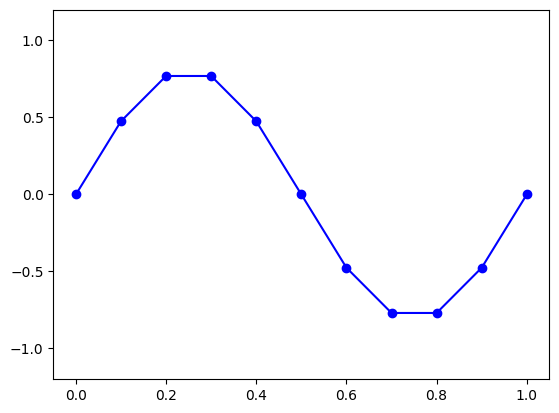

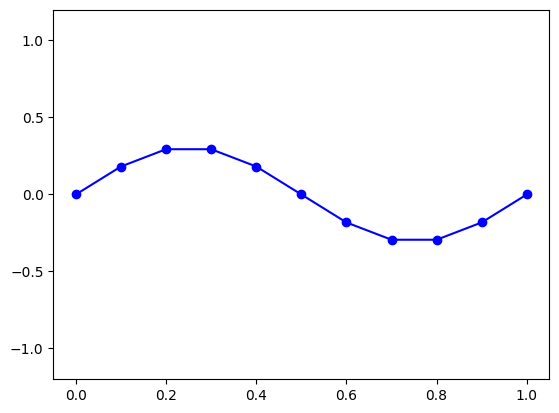

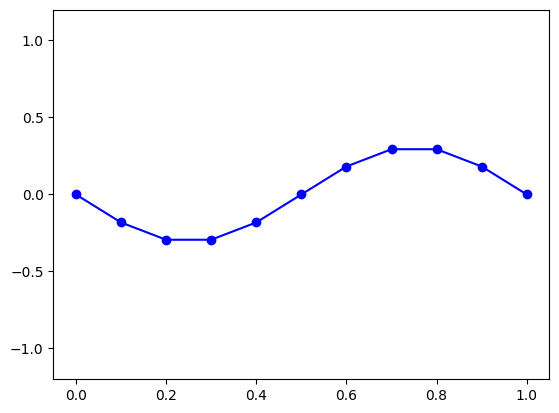

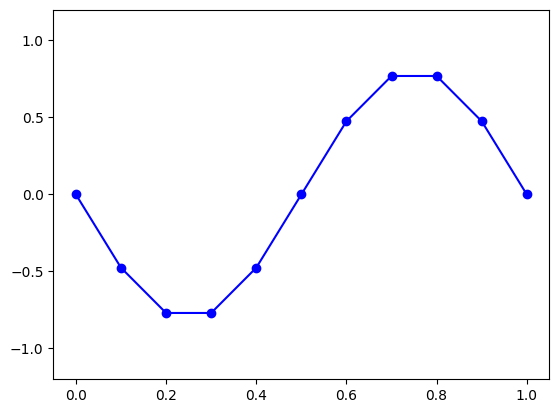

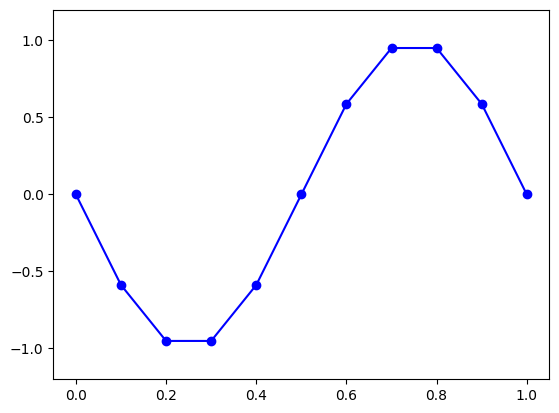

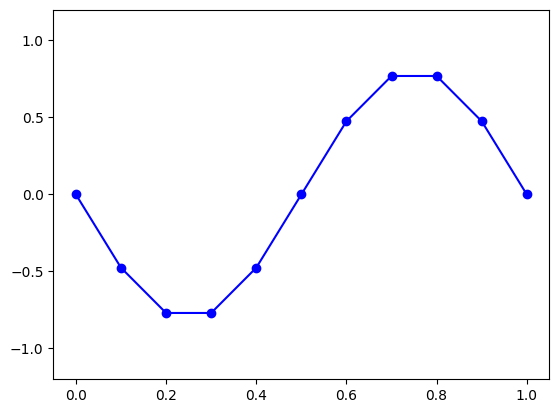

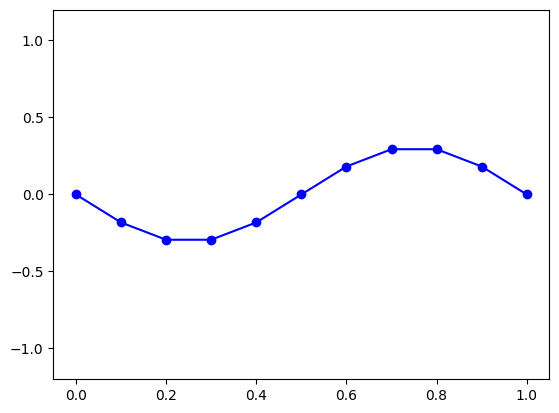

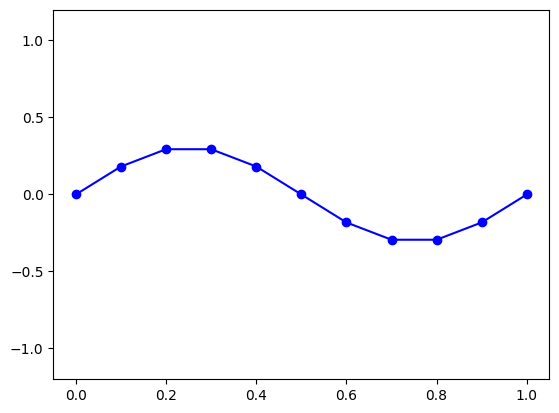

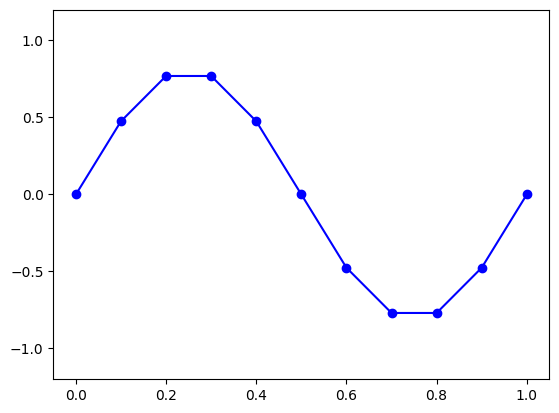

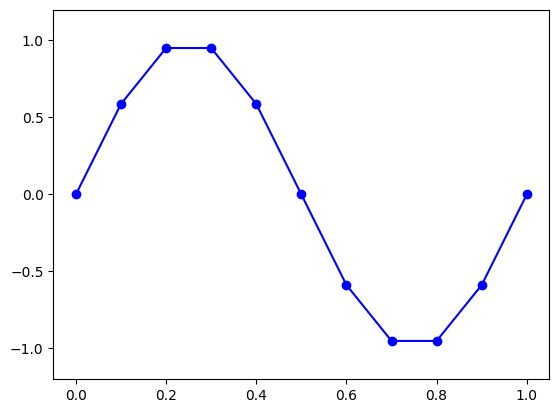

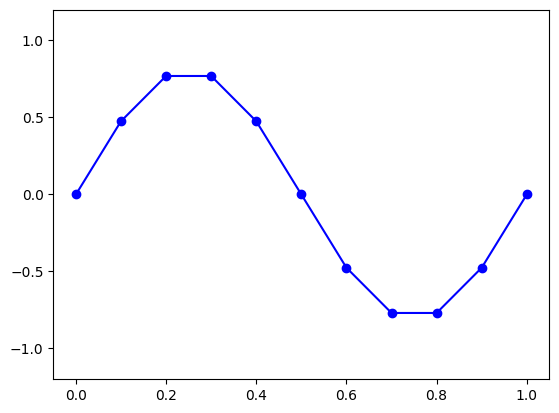

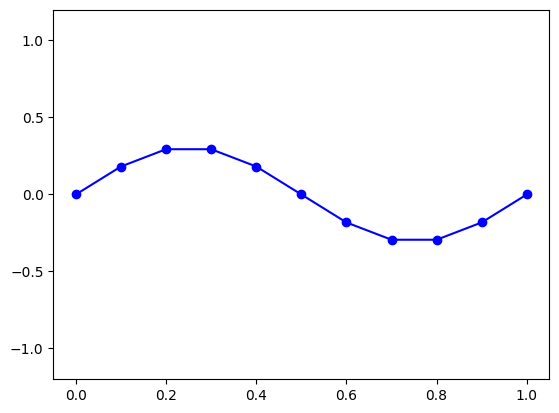

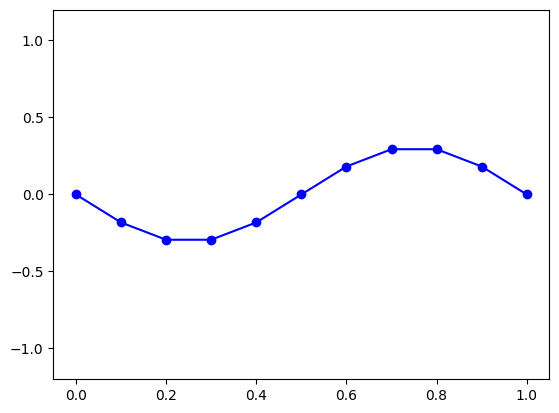

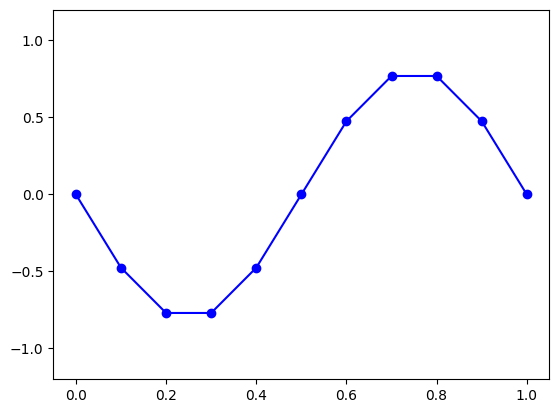

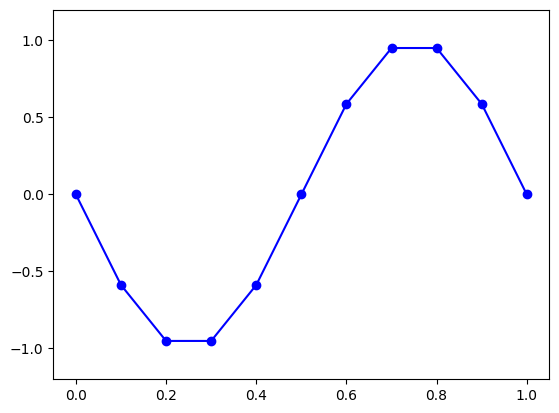

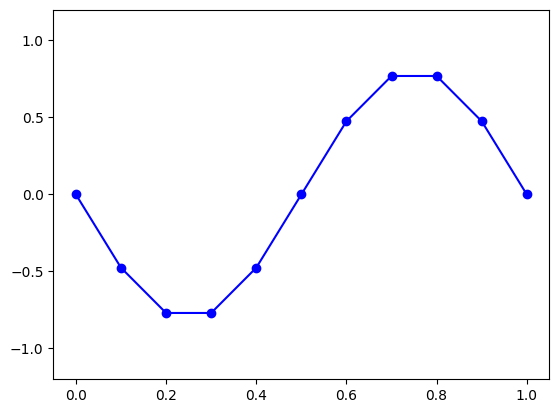

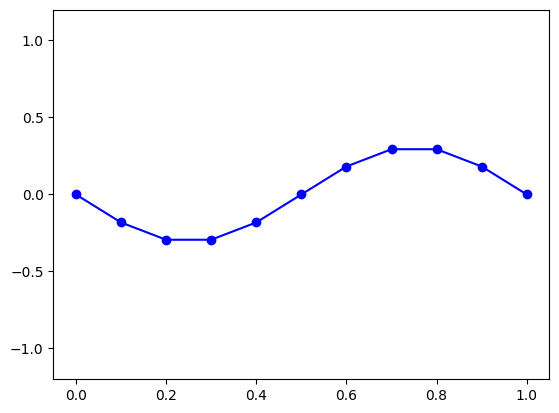

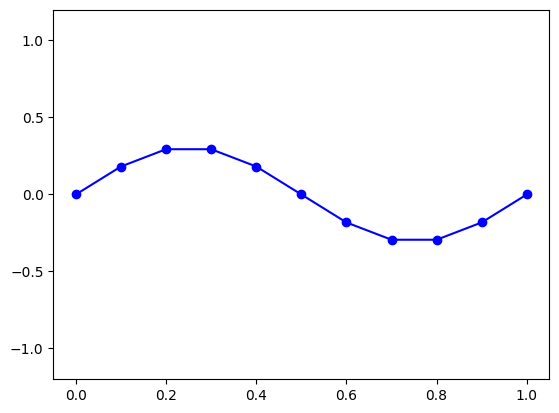

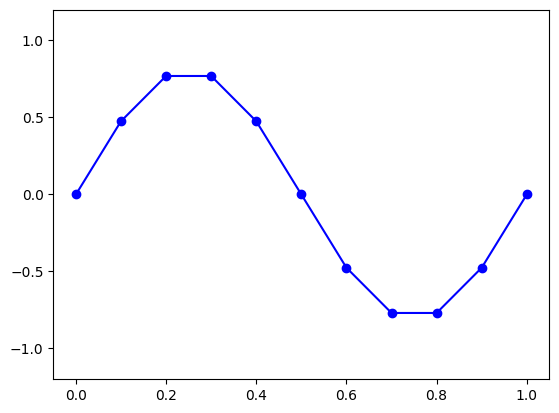

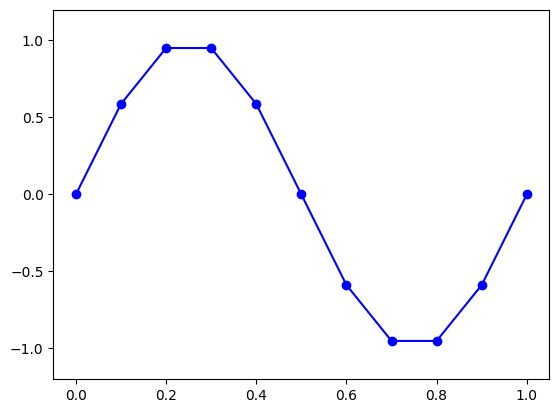

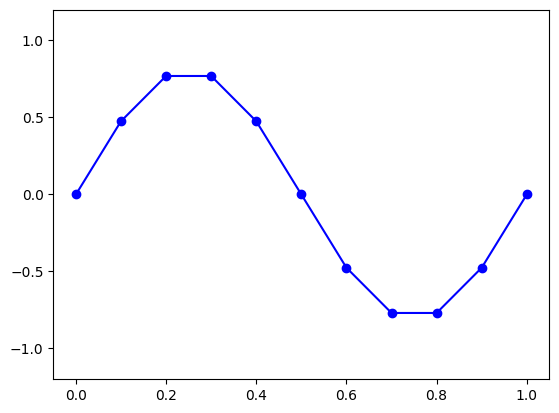

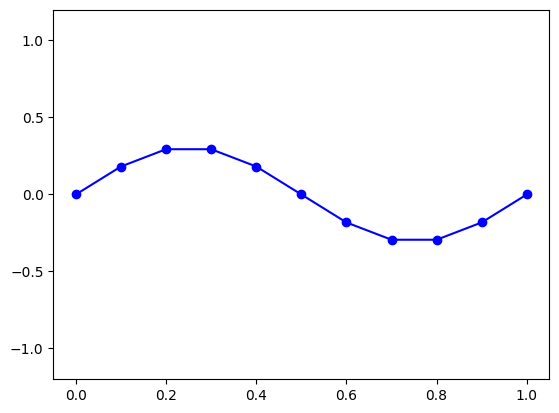

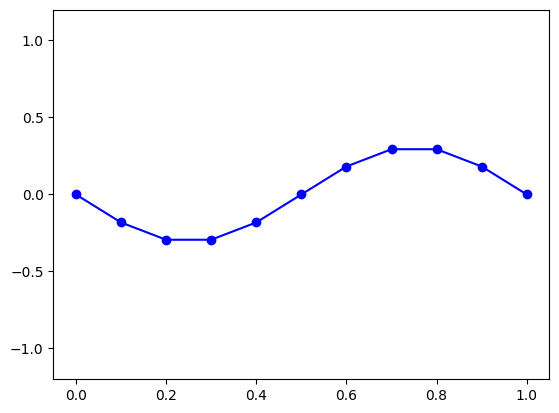

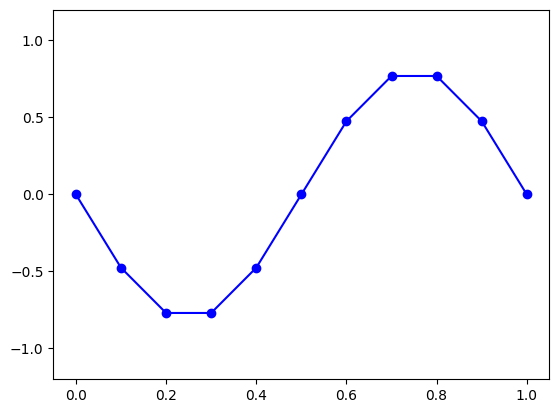

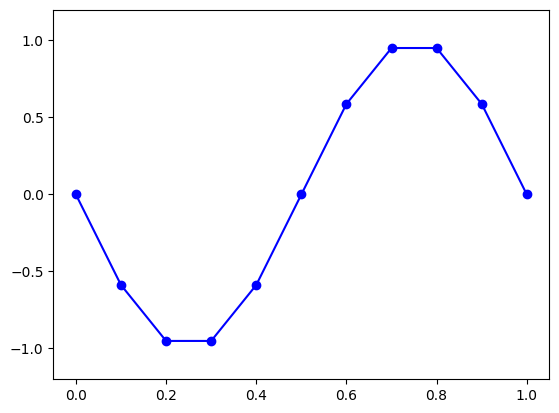

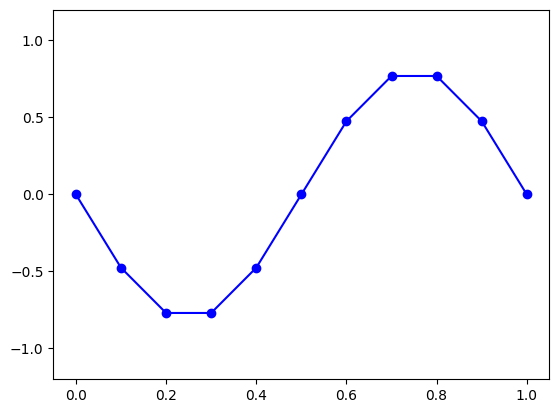

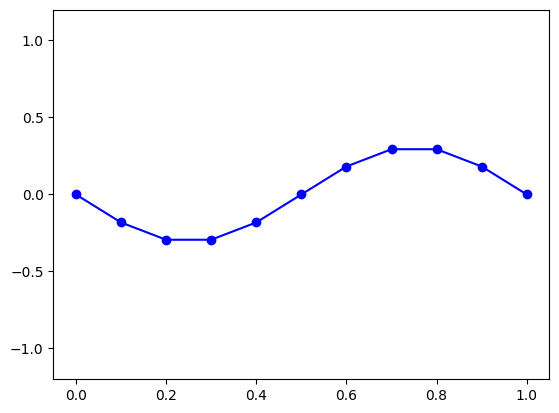

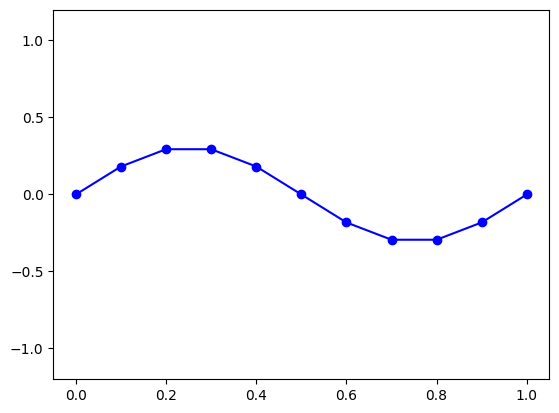

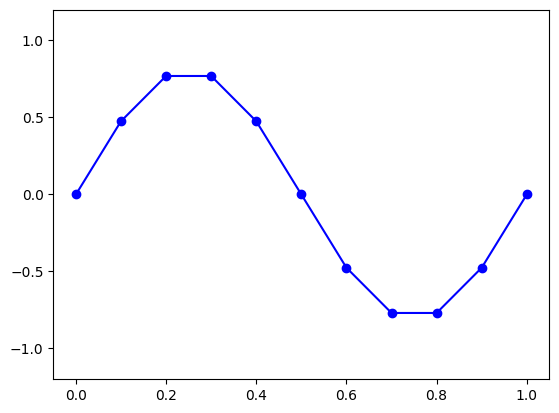

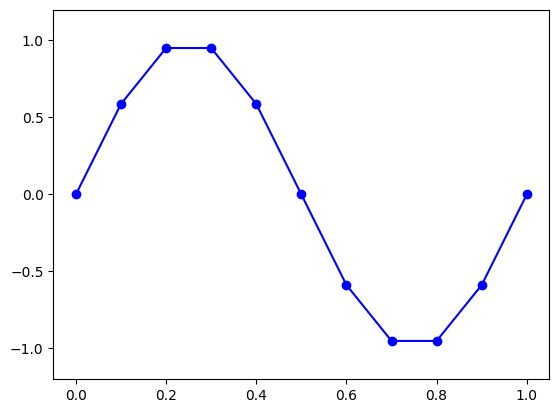

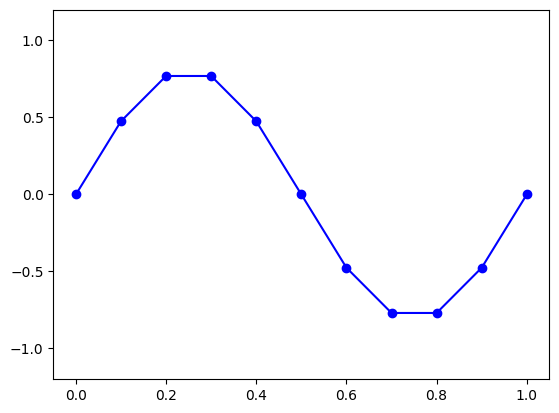

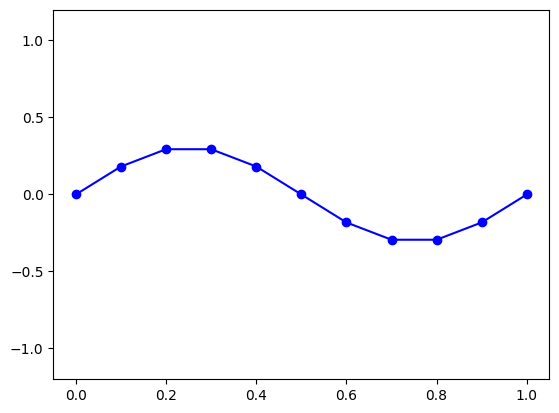

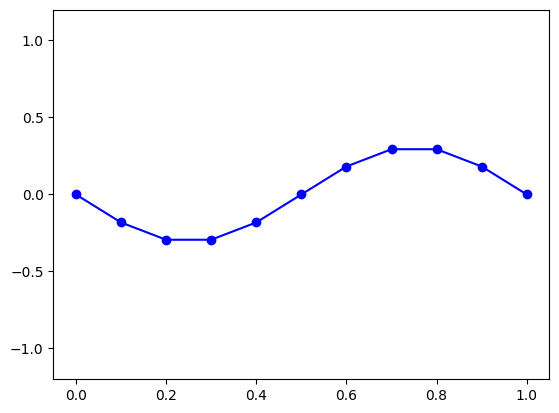

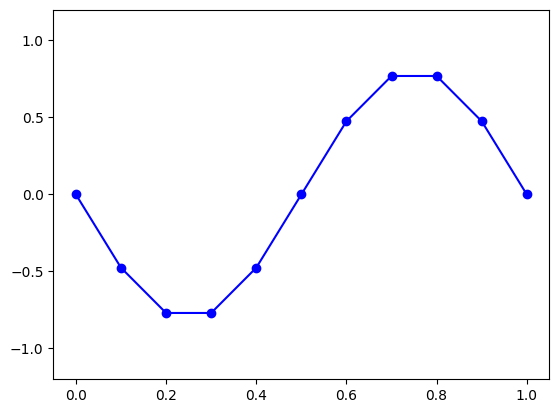

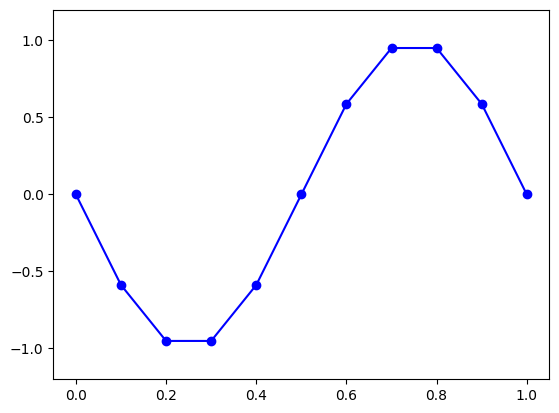

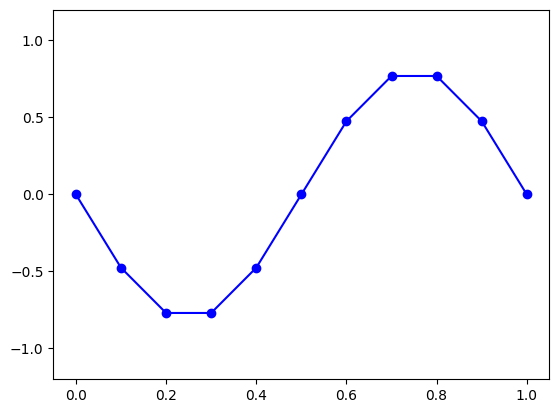

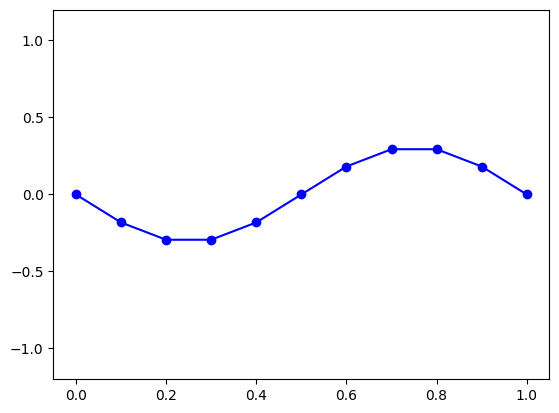

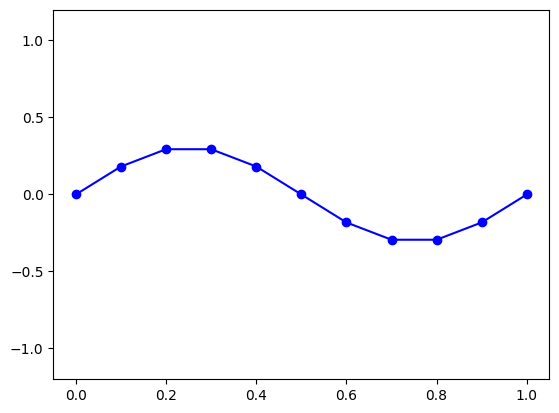

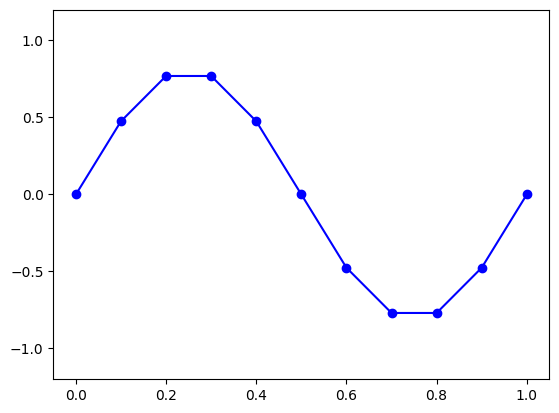

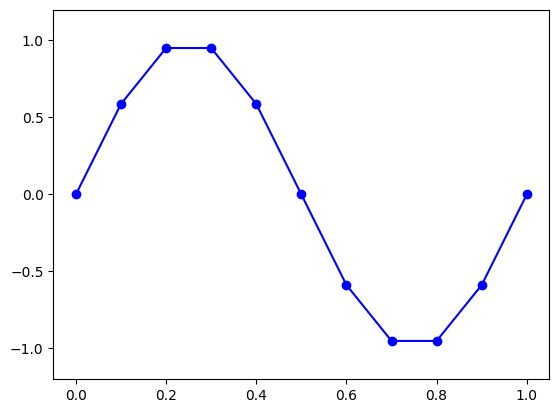

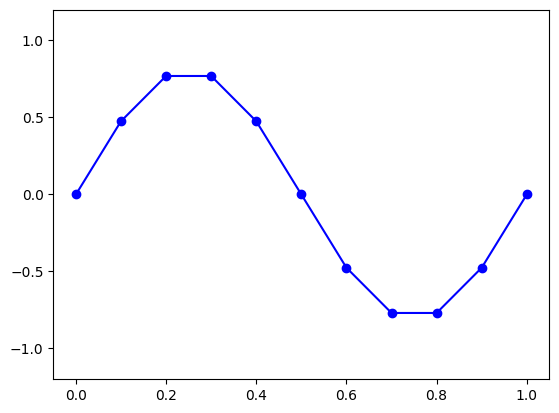

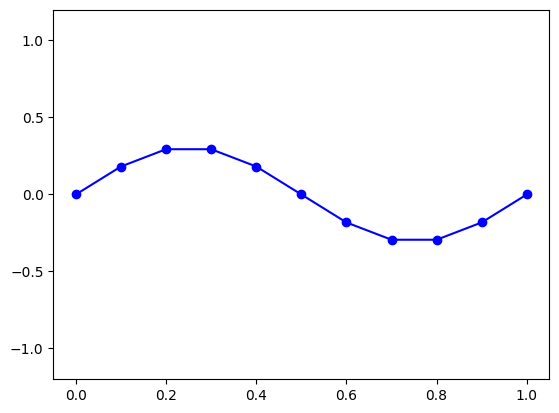

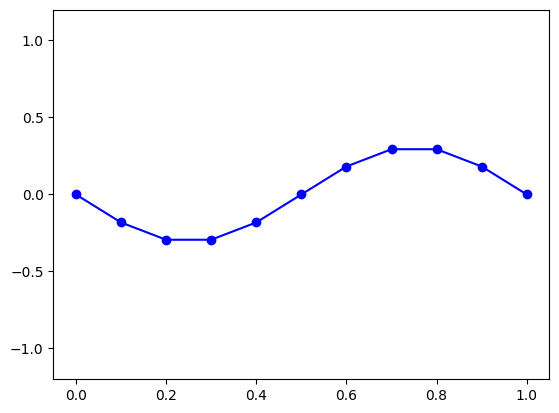

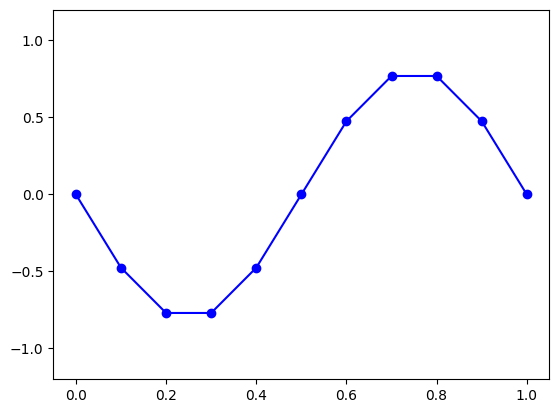

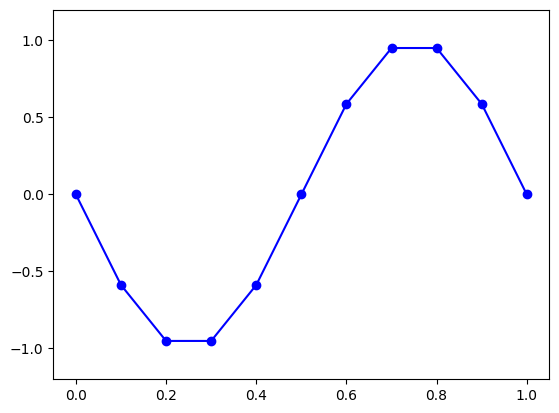

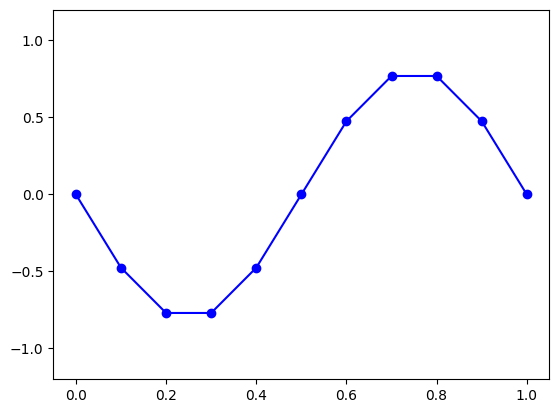

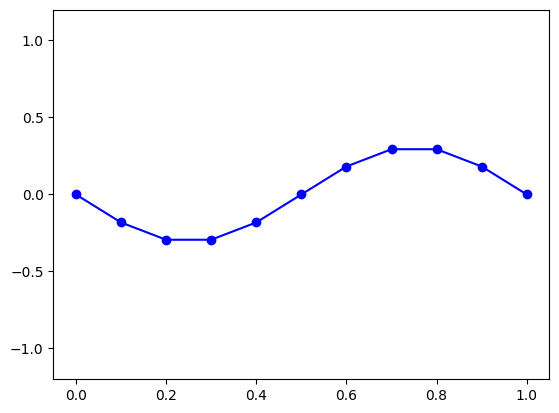

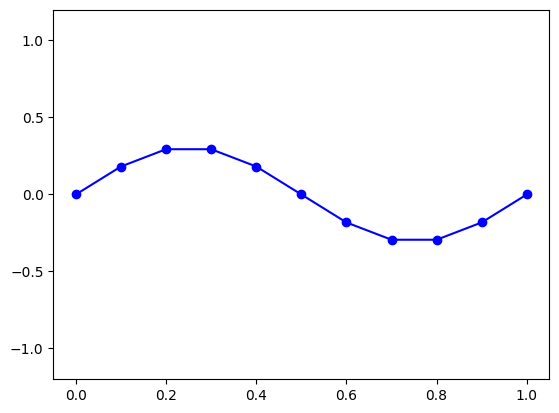

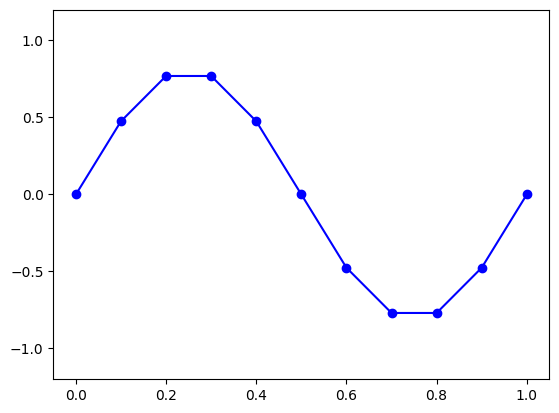

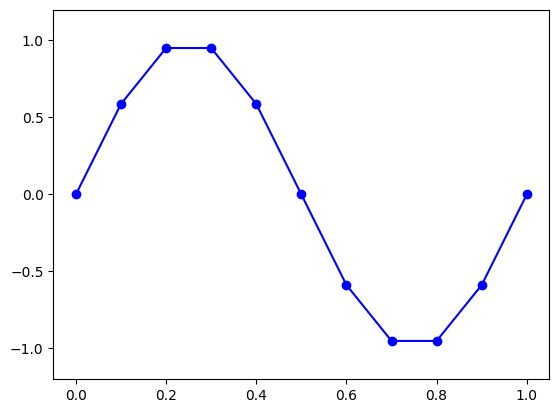

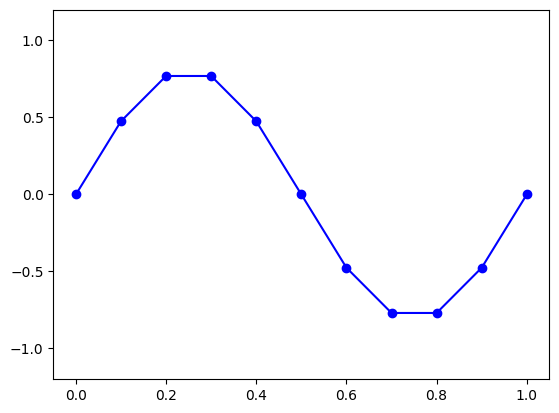

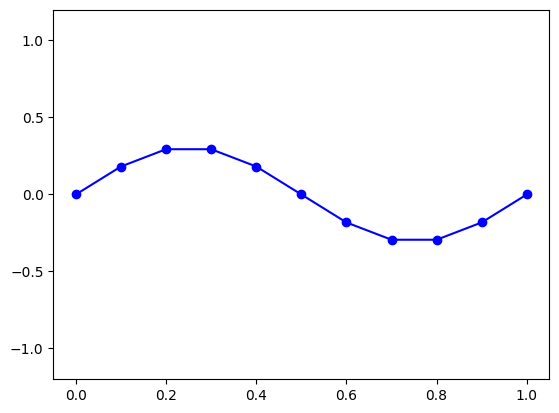

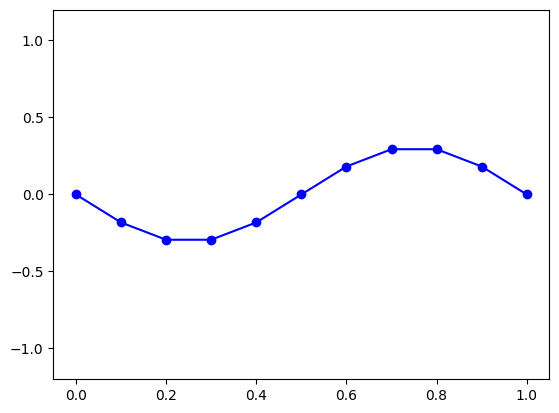

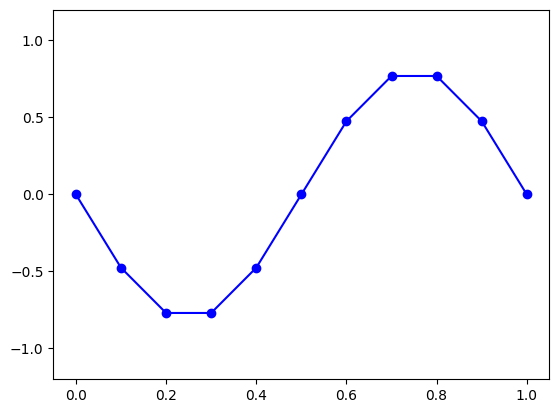

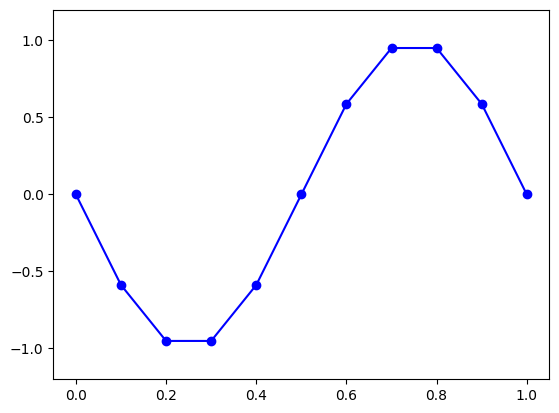

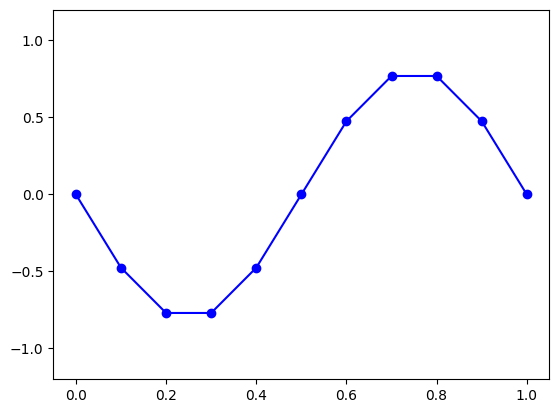

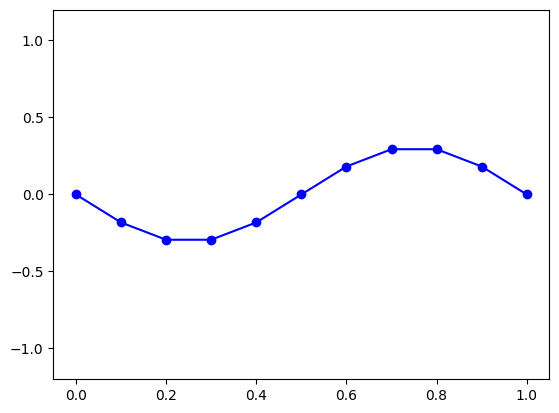

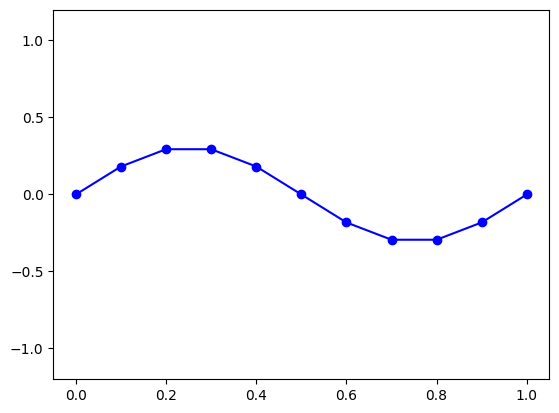

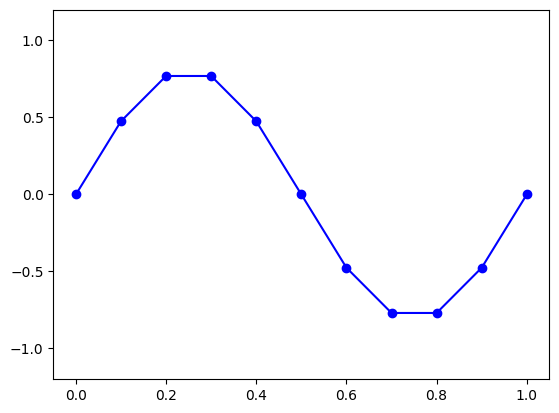

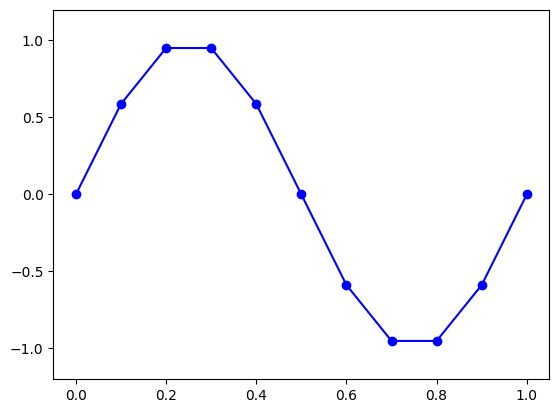

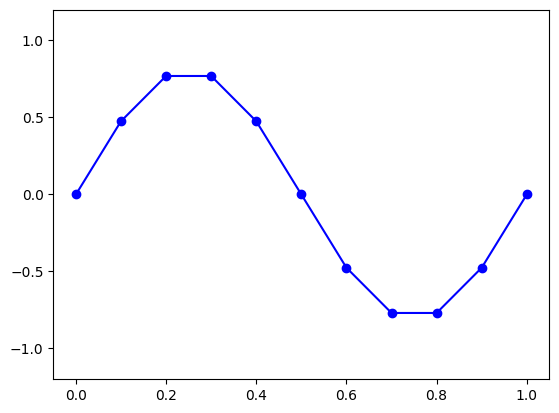

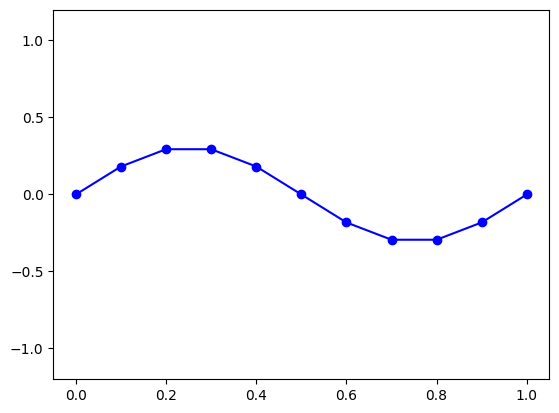

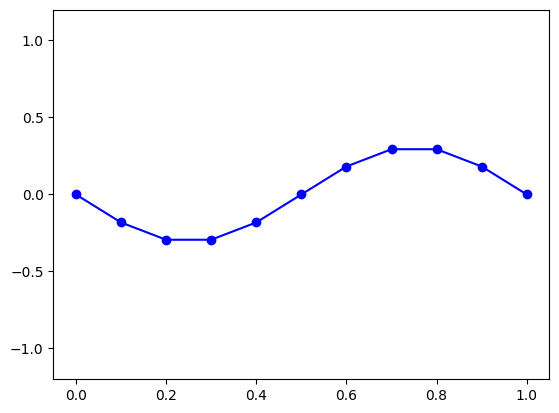

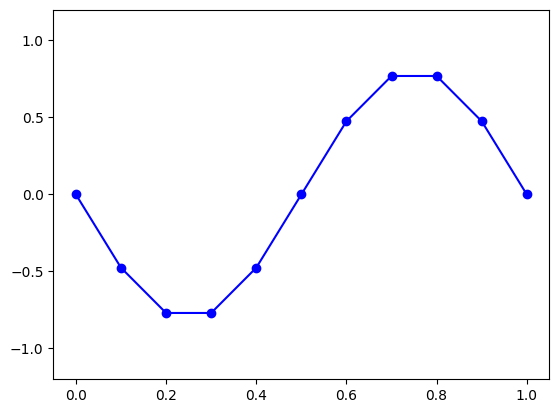

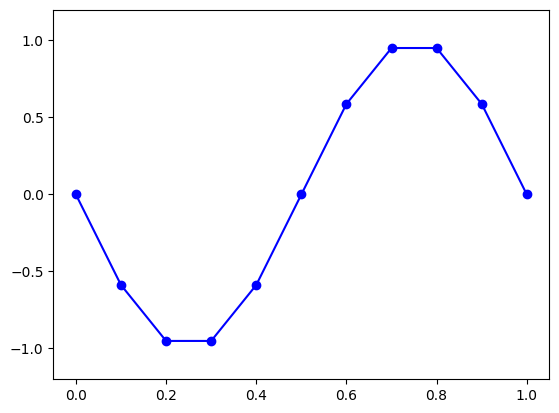

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
L = 1.0
dx = 0.1
c = 1.0
dt = 1.0 * dx / c  # CFL condition

# Initialize x and y arrays
x = np.arange(0, L * (1 + dx), dx)
npts = len(x)
nsteps = 200

y = np.zeros((npts, 3))
y[:, 0] = np.sin(2 * np.pi * x / L)  # Initial condition

y[1:-1, 1] = y[1:-1, 0] + 0.5 * c**2 * (dt / dx) ** 2 * (
    y[2:, 0] + y[:-2, 0] - 2 * y[1:-1, 0]
)

# Set up the figure and axis
fig, ax = plt.subplots()
line, = ax.plot(x, y[:, 0], "b-o")
ax.set_ylim(-1.2, 1.2)
ax.set_title("Wave Equation Simulation")

# Animation update function
def update(frame):
    global y
    y[1:-1, 2] = (
        2 * y[1:-1, 1]
        - y[1:-1, 0]
        + c**2 * (dt / dx) ** 2 * (y[2:, 1] + y[:-2, 1] - 2 * y[1:-1, 1])
    )

    # Shift time steps
    y[:, 0], y[:, 1] = y[:, 1], y[:, 2]

    # Update plot
    line.set_ydata(y[:, 1])
    ax.set_title(f"t={frame * dt:.2f}")
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=nsteps, interval=10, blit=True)

plt.show()
